In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = [12, 9]

In [4]:
import numpy as np
from numpy import genfromtxt

In [5]:
filename = 'test_data.csv'
directory = ''

In [6]:
data = genfromtxt(directory + filename, delimiter='\n')

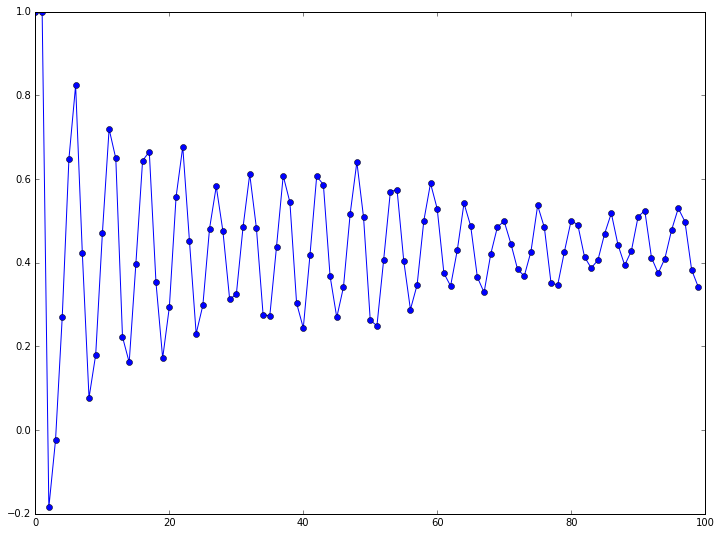

In [7]:
plot(data, '-o')

In [8]:
from statsmodels.tsa.ar_model import AR

In [9]:
l = 40
n = 100 - l

In [10]:
ar_mod = AR(data[:n])
ar_res = ar_mod.fit(3)

In [11]:
m = ar_res.params
print m

[ 0.74150942  0.14541161 -0.39173294 -0.48861442]


Learning approximation

In [12]:
learning_approx = []
for i in range(3, n):
    learning_approx.append(m[0] + data[i - 1] * m[1] + data[i - 2] * m[2] + data[i - 3] * m[3])
learning_approx = np.asarray(learning_approx)

Studying error

In [15]:
mse = ((data[3:n] - learning_approx)**2).mean()
print mse

0.00304840729516


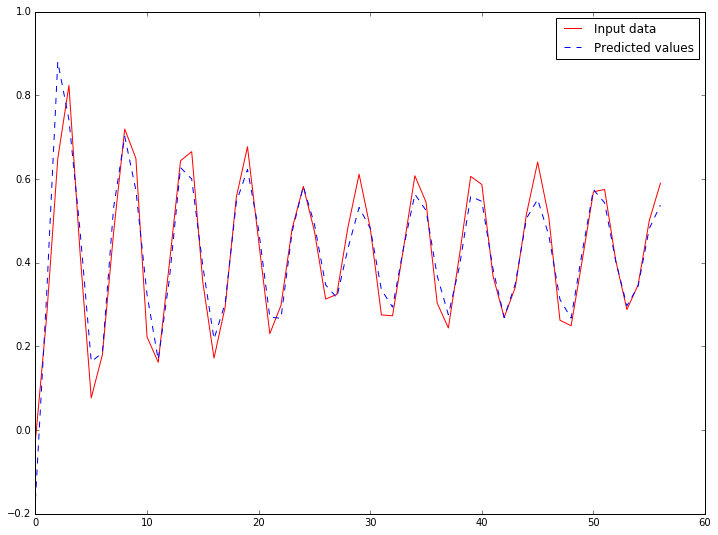

In [16]:
line1, = plt.plot(data[3:n], label='Input data', color='r')
line2, = plt.plot(learning_approx, label='Predicted values', linestyle='--')
plt.legend(handles=[line1, line2], loc=1)

Prediction

In [18]:
predict = []
for i in range(l):
    predict.append(m[0] + data[n + i - 1] * m[1] + data[n + i - 2] * m[2] + data[n + i - 3] * m[3])
predict = np.asarray(predict)

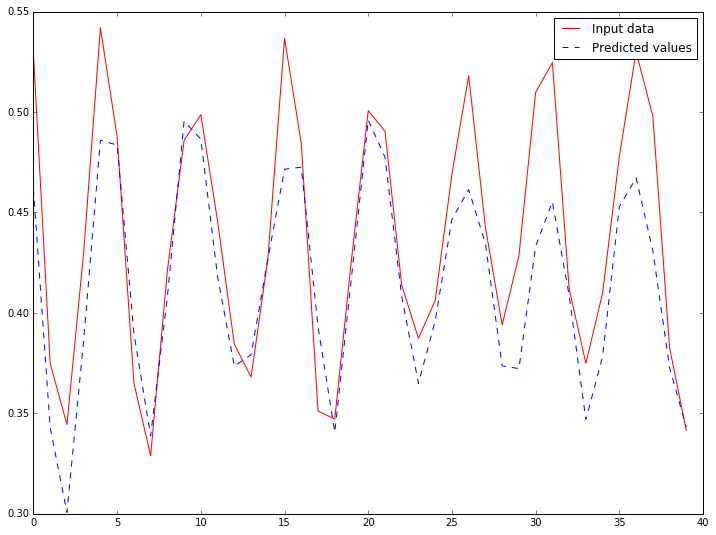

In [20]:
line1, = plt.plot(data[n:], label='Input data', color='r')
line2, = plt.plot(predict, label='Predicted values', linestyle='--')
plt.legend(handles=[line1, line2], loc=1)

In [22]:
mse = ((data[n:] - predict)**2).mean()
print mse

0.00126711507807
